In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [9]:
pd.set_option('display.max.rows',None)

In [28]:
df = pd.read_csv('../data/preprocessing/original20-21.csv')

In [39]:
pd.set_option('display.max_seq_items', None)
df.columns

Index(['아이디', '구분_법인_개인', '가중치', '(쿼터) 규모', 'A1-4_ 벤처확인 유형', 'A1-5_ 회사주소_시(도)',
       'A1-5_ 회사주소_구(군)', 'A1-6_한국표준산업분류(KSIC)코드_10차', 'A1-6-1_ 1단계 업종분류_대분류',
       'A1-6-2_ 2단계 업종분류_중분류', 'A1-6-3_ 3단계 업종분류_소분류', 'A2-1_ 창업년도',
       'A2-2_ 기업성장단계', 'A2-3_ 제조 및 비제조', 'A2-4_ 스마트공장 도입의향',
       'A2-5_ 상장여부 및 향후계획', 'B1-1_ 현 대표이사와 창업자 동일여부', 'B2-1_ 창업자 성별',
       'B2-2_ 창업 당시 창업자 연령', 'B2-3_ 창업 당시 창업자 최종학력', 'B2-3-1_ 창업 당시 창업자 전공',
       'B2-4_ 창업 직전 근무지', 'B2-6-1_ 창업방식', 'B2-6-2_ 단독창업 여부', 'B2-6-3_ 창업자 역할',
       'B2-7_ 창업 당시 목표시장', 'B2-8_ 창업 당시 창업자 실무경험 년수(년)',
       'B2-9_ 창업자 과거창업 경험 여부', 'C1-1_ 2019년 정규직_남성', 'C1-1_ 2019년 정규직_여성',
       'C1-1_ 2019년 정규직_합계', 'C1-2_ 2019년 비정규직_남성', 'C1-2_ 2019년 비정규직_여성',
       'C1-2_ 2019년 비정규직_합계', 'C1-3_ 2019년 총 종사자_남성', 'C1-3_ 2019년 총 종사자_여성',
       'C1-3_ 2019년 총 종사자_합계', 'C2-1_ 직종별 인력구성_관리', 'C2-1_ 직종별 인력구성_생산',
       'C2-1_ 직종별 인력구성_영업', 'C2-1_ 직종별 인력구성_RnD', 'C2-1_ 직종별 인력구성_기타',
       'C2-1_ 직종별 인력구성_합계', 'C2-1_ 직종별 부족인원_관리', 'C2-1_ 

In [40]:
df1 =df.copy()
import re

def keep_only_korean(column_name):
    korean_pattern = re.compile('[ㄱ-ㅎㅏ-ㅣ가-힣]+')
    korean_match = korean_pattern.findall(column_name)
    return ''.join(korean_match)

new_columns = {}
for column in df1.columns:
    new_column_name = keep_only_korean(column)
    new_columns[column] = new_column_name

df1.rename(columns=new_columns, inplace=True)

In [41]:
for column in df1.columns:
    new_column_name = keep_only_korean(column)
    new_columns[column] = new_column_name

df1.rename(columns=new_columns, inplace=True)

In [42]:
df1.columns

Index(['아이디', '구분법인개인', '가중치', '쿼터규모', '벤처확인유형', '회사주소시도', '회사주소구군',
       '한국표준산업분류코드차', '단계업종분류대분류', '단계업종분류중분류', '단계업종분류소분류', '창업년도', '기업성장단계',
       '제조및비제조', '스마트공장도입의향', '상장여부및향후계획', '현대표이사와창업자동일여부', '창업자성별',
       '창업당시창업자연령', '창업당시창업자최종학력', '창업당시창업자전공', '창업직전근무지', '창업방식', '단독창업여부',
       '창업자역할', '창업당시목표시장', '창업당시창업자실무경험년수년', '창업자과거창업경험여부', '년정규직남성',
       '년정규직여성', '년정규직합계', '년비정규직남성', '년비정규직여성', '년비정규직합계', '년총종사자남성',
       '년총종사자여성', '년총종사자합계', '직종별인력구성관리', '직종별인력구성생산', '직종별인력구성영업', '직종별인력구성',
       '직종별인력구성기타', '직종별인력구성합계', '직종별부족인원관리', '직종별부족인원생산', '직종별부족인원영업',
       '직종별부족인원연구개발', '직종별부족인원기타', '직종별부족인원합계', '학력별인력구성박사', '학력별인력구성석사',
       '학력별인력구성대졸', '학력별인력구성전문대졸', '학력별인력구성고졸이하', '학력별인력구성합계', '신규인력채용의사',
       '현재구인하기어려운직무순위', '현재구인하기어려운직무순위', '현재구인하기어려운직급순위', '현재구인하기어려운직급순위',
       '지분구조퍼센트창업자', '지분구조퍼센트임직원', '지분구조퍼센트가족', '지분구조퍼센트벤처캐피털및기관투자자',
       '지분구조퍼센트엔젤및액셀러레이터', '지분구조퍼센트개인투자자', '년자산백만원', '년부채백만원', '년자본백만원',
       '년매출액백만원', '년영업이익백만원', '년금융비용백만원', '년당기

In [43]:
column_names = ['B2C', 'B2B', '순위', '단계', 'RnD', 'B2G', 'MnA', 'R_D', '2019', '2020']

In [44]:
# 컬럼 이름 부분 일치 여부 확인하여 출력
for col_name in column_names:
    matching_cols = [col for col in df.columns if col_name in col]
    if matching_cols:
        print(matching_cols)

['D4_ 매출구조(퍼센트)_(B2C)소비자 매출', 'D4_1_5 2020년도 - B2C (소비자 매출)']
['D4_ 매출구조(퍼센트)_(B2B)대기업 또는 대기업그룹사 소속사', 'D4_ 매출구조(퍼센트)_(B2B)(대기업에 납품하는 1_2차 벤더)', 'D4_ 매출구조(퍼센트)_(B2B)(중소기업 및 벤처기업)', 'D4_ 매출구조(퍼센트)_(B2B)(중견기업)']
['C5-1_ 현재 구인하기 어려운 직무(1순위)', 'C5-1_ 현재 구인하기 어려운 직무(2순위)', 'C5-2_ 현재 구인하기 어려운 직급(1순위)', 'C5-2_ 현재 구인하기 어려운 직급(2순위)', 'G7_ 해외수출 및 진출과정 애로사항(1순위)', 'G7_ 해외수출 및 진출과정 애로사항(2순위)', 'I8_ 인수합병 환경개선을 위한 필요사항(1순위)', 'I8_ 인수합병 환경개선을 위한 필요사항(2순위)', 'J4_ 기업간 거래시 애로사항(1순위)']
['A1-6-1_ 1단계 업종분류_대분류', 'A1-6-2_ 2단계 업종분류_중분류', 'A1-6-3_ 3단계 업종분류_소분류', 'A2-2_ 기업성장단계']
['C2-1_ 직종별 인력구성_RnD', 'C2-1_ 직종별 부족인원_연구개발(RnD)', 'D5-1_ 연구개발(RnD)자금(출연금)_경험여부', 'D7_ 투자처별 투자액(백만원)_국내연구개발(RnD)']
['D4_ 매출구조(퍼센트)_(B2G)정부 포함 공공부문 매출', 'D4_1_6 2020년도 - B2G (정부 포함 공공부문 매출)']
['I4_ 인수합병(MnA) 경험여부', 'K2-1_ 현재 벤처인프라 수준_인수합병(MnA) 활성화를 위한 제도개선']
['D7_1_2 2020년도  - 국내R_D투자액']
['C1-1_ 2019년 정규직_남성', 'C1-1_ 2019년 정규직_여성', 'C1-1_ 2019년 정규직_합계', 'C1-2_ 2019년 비정규직_남성', 'C1-2_ 2019년 비정규직_여성', 'C1-2_ 2019년 비정규직_합계', 'C1-3_ 2019년 총 

In [45]:
cn = {
    '매출구조퍼센트소비자매출' : '매출구조(퍼센트)_(B2C)소비자매출',
    '년도소비자매출' : '2020년도_(B2C)소비자매출',
    '매출구조퍼센트대기업또는대기업그룹사소속사' : '매출구조(퍼센트)_(B2B)대기업 또는 대기업그룹사 소속사',
    '매출구조퍼센트대기업에납품하는차벤더' : '매출구조(퍼센트)_(B2B)대기업에 납품하는 1,2차 벤더',
    '매출구조퍼센트중소기업및벤처기업' : '매출구조(퍼센트)_(B2B)중소기업 및 벤처기업',
    '매출구조퍼센트중견기업' : '매출구조(퍼센트)_(B2B)중견기업',
    '현재구인하기어려운직무순위' : '현재 구인하기 어려운 직무(1순위)',
    '현재구인하기어려운직급순위' : '현재 구인하기 어려운 직급(1순위)',
    '해외수출및진출과정애로사항순위' : '해외수출 및 진출과정 애로사항(1순위)',
    '인수합병환경개선을위한필요사항순위' : '인수합병 환경개선을 위한 필요사항(1순위)',
    '기업간거래시애로사항순위' : '기업간 거래시 애로사항(1순위)',
    '단계업종분류대분류' : '1단계업종분류대분류',
    '단계업종분류중분류' : '2단계업종분류중분류',
    '단계업종분류소분류' : '3단계업종분류소분류',
    '직종별인력구성' : '직종별인력구성_(Rnd)',
    '직종별부족인원연구개발' : '직종별 부족인원_연구개발(RnD)',
    '연구개발자금출연금경험여부' : '연구개발(RnD)자금(출연금)_경험여부',
    '투자처별투자액백만원국내연구개발' : '투자처별 투자액(백만원)_국내연구개발(RnD)',
    '매출구조퍼센트정부포함공공부문매출' : '매출구조(퍼센트)_(B2G)정부 포함 공공부문 매출',
    '년도정부포함공공부문매출' : '2020년도 - B2G (정부 포함 공공부문 매출)',
    '인수합병경험여부' : '인수합병(MnA) 경험여부',
    '현재벤처인프라수준인수합병활성화를위한제도개선' : '현재 벤처인프라 수준_인수합병(MnA) 활성화를 위한 제도개선',
    '년도국내투자액' : '2020년도 - 국내R_D투자액',
    '년정규직남성' : '2019년 정규직_남성',
    '년정규직여성' : '2019년 정규직_여성',
    '년정규직합계' : '2019년 정규직_합계',
    '년비정규직남성' : '2019년 비정규직_남성',
    '년비정규직여성' : '2019년 비정규직_여성',
    '년비정규직합계' : '2019년 비정규직_합계',
    '년총종사자남성' : '2019년 총 종사자_남성',
    '년총종사자여성' : '2019년 총 종사자_여성',
    '년총종사자합계' : '2019년 총 종사자_합계',
    '년자산백만원' : '2019년 자산(백만원)',
    '년부채백만원' : '2019년 부채(백만원)',
    '년자본백만원' : '2019년 자본(백만원)',
    '년매출액백만원' : '2019년 매출액(백만원)',
    '년영업이익백만원' : '2019년 영업이익(백만원)',
    '년금융비용백만원' : '2019년 금융비용(백만원)',
    '년당기순이익백만원' : '2019년 당기순이익(백만원)',
    '년정규직수남성' : '2020년 정규직 수 (남성)',
    '년정규직수여성' : '2020년 정규직 수 (여성)',
    '년정규직수합계' : '2020년 정규직 수 (합계)',
    '년비정규직수남성' : '2020년 비정규직 수 (남성)',
    '년비정규직수여성' : '2020년 비정규직 수 (여성)',
    '년비정규직수합계' : '2020년 비정규직 수 (합계)',
    '년총종사자수남성' : '2020년 총 종사자 수 (남성)',
    '년총종사자수여성' : '2020년 총 종사자 수 (여성)',
    '년총종사자수합계' : '2020년 총 종사자 수 (합계)',
    '년도대기업또는대기업그룹사소속사' : '2020년도 - 대기업 또는 대기업그룹사 소속사',
    '년도대기업에납품하는차벤더협력업체' : '2020년도 - 대기업에 납품하는 12차 벤더 (협력업체)',
    '년도중소기업및벤처기업' : '2020년도 - 중소기업 및 벤처기업',
    '년도중견기업' : '2020년도 - 중견기업',
    '년도해외' : '2020년도 - 해외-',
    '년도국내설비투자액' : '2020년도 - 국내설비투자액',
    '년도해외투자액' : '2020년도 - 해외투자액',
    '년도기타' : '2020년도 - 기타',
    '년도합계' : '2020년도 - 합계',
    '년기준귀사의해외사업방식은어디에해당되십니까' : '2020년 기준 귀사의 해외 사업 방식은 어디에 해당되십니까'
}

In [46]:
df1 = df1.rename(columns=cn)

In [56]:
df1.to_csv('new_20_21_encoding.csv', encoding='euc-kr')

In [54]:
new_df = pd.read_csv('../data/preprocessing/new_20_21.csv', index_col=0)

In [59]:
new_df.columns[58]

'현재 구인하기 어려운 직급(1순위)'

In [3]:
df_2021 = pd.read_excel('../code/new_20_21_encoding.xlsx', index_col=0)

In [62]:
df_2021.columns

Index(['Unnamed: 0', '아이디', '구분법인개인', '가중치', '쿼터규모', '벤처확인유형', '회사주소시도',
       '회사주소구군', '한국표준산업분류코드차', '1단계업종분류대분류', '2단계업종분류중분류', '3단계업종분류소분류',
       '창업년도', '기업성장단계', '제조및비제조', '스마트공장도입의향', '상장여부및향후계획', '현대표이사와창업자동일여부',
       '창업자성별', '창업당시창업자연령', '창업당시창업자최종학력', '창업당시창업자전공', '창업직전근무지', '창업방식',
       '단독창업여부', '창업자역할', '창업당시목표시장', '창업당시창업자실무경험년수년', '창업자과거창업경험여부',
       '2019년 정규직_남성', '2019년 정규직_여성', '2019년 정규직_합계', '2019년 비정규직_남성',
       '2019년 비정규직_여성', '2019년 비정규직_합계', '2019년 총 종사자_남성', '2019년 총 종사자_여성',
       '2019년 총 종사자_합계', '직종별인력구성관리', '직종별인력구성생산', '직종별인력구성영업',
       '직종별인력구성_(Rnd)', '직종별인력구성기타', '직종별인력구성합계', '직종별부족인원관리', '직종별부족인원생산',
       '직종별부족인원영업', '직종별 부족인원_연구개발(RnD)', '직종별부족인원기타', '직종별부족인원합계',
       '학력별인력구성박사', '학력별인력구성석사', '학력별인력구성대졸', '학력별인력구성전문대졸', '학력별인력구성고졸이하',
       '학력별인력구성합계', '신규인력채용의사', '현재 구인하기 어려운 직무(1순위)', '현재 구인하기 어려운 직무(2순위)',
       '현재 구인하기 어려운 직급(1순위)', '현재 구인하기 어려운 직급(2순위)', '지분구조퍼센트창업자',
       '지분구조퍼센트임직원', '지분구조퍼센트가족', '지분구조퍼센트벤처캐피털및기관

In [45]:
df = pd.read_csv('../data/합친data.csv')
df

,법인|개인,가중치,벤처확인 유형,회사주소_시(도),회사주소_구(군),한국표준산업분류(KSIC)코드_10차,A창업년도,A기업성장단계,A제조 및 비제조,A23_2_아웃소싱_공통,...,D2019년 부채(백만원),D2019년 자본(백만원),D2019년 매출액(백만원),D2019년 영업이익(백만원),D2019년 금융비용(백만원),D2019년 당기순이익(백만원),I인수합병(MnA) 경험여부,I피인수합병 경험여부,I다른 업체를 인수합병 할 의향여부,I다른 업체의 인수합병에 응할 의향여부
0,법인,1.727,3,제주,제주시,A01123,1987,4,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,법인,1.727,3,충북,진천군,A01140,2013,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,법인,1.727,2,충남,보령시,A01231,2011,3,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,법인,18.100,3,전북,완주군,A01420,2017,1,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,개인,3.500,1,경남,창원시 성산구,B07290,2017,2,2,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,법인,1.350,3,서울,용산구,R90199,2005,4,4,NaN,...,111510,161798,416663,85850,1225,63868,2.0,2.0,2.0,2.0
7048,법인,30.356,1,서울,강남구,R91136,2017,2,4,NaN,...,989,521,"1,186",-232,13,-139,2.0,2.0,1.0,2.0
7049,법인,0.323,2,경기,고양시 덕양구,S95110,2007,3,1,NaN,...,"4,203","2,609","41,138","1,204",91,"1,161",2.0,2.0,2.0,2.0
7050,법인,0.323,2,서울,영등포구,S95120,2015,2,4,NaN,...,"9,698","2,366","46,454",-207,204,-372,2.0,2.0,2.0,2.0


In [3]:
df.to_csv('합친data(encoding).csv', encoding='euc-kr')

In [4]:
df['B12_대표이사_성별_법인'].isna().sum()

6772

In [7]:
df['B15_대표이사_이전근무지_기타_법인'].isna().sum()

7043

In [6]:
df['B15_대표이사_이전근무지_법인'].isna().sum()

6772

In [ ]:
df.drop('B12_대표이사_성별_법인')

In [8]:
df['B11_대표이사_창업자여부_법인'].value_counts()

B11_대표이사_창업자여부_법인
1.0    1453
2.0     280
Name: count, dtype: int64

In [9]:
df['B현 대표이사와 창업자 동일여부'].value_counts()

B현 대표이사와 창업자 동일여부
1.0    3774
2.0     656
Name: count, dtype: int64

In [ ]:
for i in df.index:
    if df.loc[i, '대표이사 창업자 동일 여부'] == 1.0:
        df.loc[i, '대표이사 이전 근무지'] = df.loc[i, '창업자 이전 근무지']

In [13]:
(df['법인|개인'] == '개인').sum()

889

In [29]:
df = pd.read_csv('../data/new합친data.csv')

In [16]:
df['대표이사_창업자여부'].isna().sum()

0

In [24]:
df['창업 직전 근무지'].isna().sum()

0

In [17]:
df['24_창업주_이전근무지_기타_공통'].isna().sum()

6090

In [18]:
df['15_대표이사_이전근무지_기타_법인'].isna().sum()

6154

In [26]:
df['15_대표이사_이전근무지_기타_법인'].isna().sum()

927

In [19]:
df['15_대표이사_이전근무지_법인'].isna().sum()

5883

In [28]:
df['15_대표이사_이전근무지_법인'].isna().sum()

656

In [23]:
pd.reset_option('display.max_seq_items', None)
A = df[['24_창업주_이전근무지_기타_공통', '15_대표이사_이전근무지_기타_법인', '15_대표이사_이전근무지_법인']].copy()
A

,24_창업주_이전근무지_기타_공통,15_대표이사_이전근무지_기타_법인,15_대표이사_이전근무지_법인
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
6158,NaN,NaN,NaN
6159,NaN,NaN,NaN
6160,NaN,NaN,NaN
6161,NaN,NaN,NaN


In [27]:
mask = df['대표이사_창업자여부'] == 1  # df 컬럼의 값이 1인 행을 선택하기 위한 마스크 생성
df.loc[mask, '15_대표이사_이전근무지_법인'] = df.loc[mask, '창업 직전 근무지']  # A 컬럼 값이 1인 행의 C 컬럼 값을 B 컬럼 값으로 대체

In [30]:
df['23_2_아웃소싱_공통'].isna().sum()

5605

In [31]:
df['스마트공장 도입의향'].isna().sum()

4430

In [32]:
df['16_대표이사_업무경력분야2_0_법인'].isna().sum()

5883

In [33]:
df['16_대표이사_업무경력분야2_1_법인'].isna().sum()

6110

In [36]:
df['25_창업주_업무경력분야_0_공통'].isna().sum()

4430

In [38]:
df['262_2_멤버수_법인'].isna().sum()

5941

In [40]:
df['창업 당시 목표시장'].isna().sum()

0

In [41]:
df['4_예상신규채용_신규채용의사_공통'].isna().sum()

4430

In [42]:
df['4_예상신규채용_2020년_채용인원_공통'].isna().sum()

4975

In [43]:
df['4_예상신규채용_채용인원합계_공통'].isna().sum()

4975

In [44]:
df['4_예상신규채용_2019년하반기_채용인원_공통'].isna().sum()

4975

In [2]:
df = pd.read_csv('../data/new_합친data.csv')

In [4]:
pd.set_option('display.max.col',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Columns: 319 entries, 법인|개인 to 다른 업체의 인수합병에 응할 의향여부
dtypes: float64(257), int64(43), object(19)
memory usage: 15.0+ MB


In [5]:
# df.to_csv('newdf.csv', encoding='euc-kr')

In [22]:
df

,법인|개인,가중치,벤처확인 유형,회사주소_시(도),회사주소_구(군),한국표준산업분류(KSIC)코드_10차,창업년도,기업성장단계,제조 및 비제조,상장여부 및 향후계획,...,2019년 부채(백만원),2019년 자본(백만원),2019년 매출액(백만원),2019년 영업이익(백만원),2019년 금융비용(백만원),2019년 당기순이익(백만원),인수합병(MnA) 경험여부,피인수합병 경험여부,다른 업체를 인수합병 할 의향여부,다른 업체의 인수합병에 응할 의향여부
0,법인,10.420,3,경기,군포시,A01110,2009,2,4,4.0,...,9818,-820,5,-2275,891,-2955,2.0,2.0,2.0,2.0
1,법인,3.484,1,광주,북구,A01110,2010,4,4,4.0,...,"2,404",903,"6,039",259,62,185,2.0,2.0,2.0,2.0
2,법인,13.645,2,경남,합천군,A01122,2000,4,4,4.0,...,"2,524","5,180","3,633",334,121,293,2.0,2.0,2.0,2.0
3,법인,1.832,2,서울,송파구,A01123,2004,3,2,1.0,...,"24,857","14,601","17,889","-1,614",741,"-4,173",2.0,2.0,2.0,2.0
4,법인,1.980,3,제주,제주시,A01123,1987,4,1,2.0,...,29245,12999,27576,414,1047,-683,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,법인,30.356,1,서울,강남구,R91136,2017,2,4,4.0,...,989,521,"1,186",-232,13.0,-139,2.0,2.0,1.0,2.0
6159,법인,0.323,2,경기,고양시 덕양구,S95110,2007,3,1,4.0,...,"4,203","2,609","41,138","1,204",91.0,"1,161",2.0,2.0,2.0,2.0
6160,법인,0.323,2,서울,영등포구,S95120,2015,2,4,1.0,...,"9,698","2,366","46,454",-207,204.0,-372,2.0,2.0,2.0,2.0
6161,법인,1.831,2,서울,영등포구,S95120,2015,3,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['51_연구개발(RnD)_2018년총금액_공통'].isna().sum()

5821

In [7]:
df['5_개인사업자_향후법인전환의사여부_개인'].isna().sum()

6163

In [8]:
df['6_신규자금조달_정부지원금_법인'].isna().sum()

4707

In [9]:
df['투자처별 투자액(백만원)_국내설비'].isna().sum()

4430

In [11]:
df['투자처별 투자액(백만원)_국내연구개발(RnD)'].isna().sum()

4430

In [12]:
df['8_스톡옵션상황_법인'].isna().sum()

4430

In [13]:
df['주력기술과 4차 산업혁명 관련 여부'].isna().sum()

4430

In [14]:
df['11_분야별주력제품관련성_0_공통'].isna().sum()

5352

In [15]:
df['11_분야별주력제품관련성_1_공통'].isna().sum()

5715

In [18]:
df['11_분야별주력제품관련성_2_공통'].isna().sum()

5907

In [23]:
df['제품 및 서비스 구조'].isna().sum()

4430

In [24]:
df['2_영업및마케팅방식_기타_공통'].isna().sum()

6120

In [25]:
df['4_글로벌사업방식_법인'].isna().sum()

4430

In [26]:
df['1_선호협력기관_메인파트너_1순위_공통'].isna().sum()

5124

In [27]:
df['1_선호협력기관_메인파트너_2순위_공통'].isna().sum()

5438

In [29]:
df['12_협력활동유형_공통'].isna().sum()

5658

In [30]:
df['벤처캐피털(투자조합포함) 투자 경험여부'].value_counts()

벤처캐피털(투자조합포함) 투자 경험여부
2.0    5541
1.0     622
Name: count, dtype: int64

In [31]:
df['31_투자한벤처캐피탈역할_법인'].isna().sum()

5880

In [32]:
df['321_도움여부_법인'].isna().sum()

6117

In [33]:
df['322_도움여부_법인'].isna().sum()

6117

In [34]:
df['323_도움여부_법인'].isna().sum()

6117

In [35]:
df['324_도움여부_법인'].isna().sum()

6117

In [36]:
df['321_도움여부_법인'].isna().sum()

6117

In [38]:
df['4_인수합병의향_법인'].isna().sum()

4430

In [37]:
df['5_인수합병응할의향_법인'].isna().sum()

4430

In [39]:
df['다른 업체를 인수합병 할 의향여부'].isna().sum()

1733

In [40]:
df['11_납품단가_법인'].isna().sum()

5351

In [41]:
df_2021 = pd.read_csv('../data/원본data/2021.csv', encoding='cp949')

In [42]:
df_2021['J2_3_1 중소기업 및 벤처기업에 매출 - 현재 이익률 (이익_판매가)']

0        2.0
1       20.0
2        5.0
3        NaN
4        NaN
        ... 
2495    25.0
2496     8.0
2497    25.0
2498    13.0
2499     9.0
Name: J2_3_1 중소기업 및 벤처기업에 매출 - 현재 이익률 (이익_판매가), Length: 2500, dtype: float64

In [43]:
df['31_실천하고있는사회적책임_1_법인'].isna().sum()

5874

In [44]:
df['31_실천하고있는사회적책임_0_법인'].isna().sum()

4430

In [45]:
df['매출규모'].isna().sum()

1733

In [46]:
df = pd.read_csv('../data/preprocessing/정리data.csv')

In [49]:
pd.set_option('display.max_seq_items', None)

df.columns

Index(['법인|개인', '가중치', '벤처확인 유형', '회사주소_시(도)', '회사주소_구(군)',
       '한국표준산업분류(KSIC)코드_10차', '창업년도', '기업성장단계', '제조 및 비제조', '상장여부 및 향후계획',
       '25_상장년도_법인', '25_상장거래소_법인', '대표이사_창업자여부', '13_대표이사_연령_법인',
       '14_대표이사_최종학력_법인', '141_대표이사_전공_법인', '141_대표이사_전공_기타_법인',
       '15_대표이사_이전근무지_법인', '창업자 성별', '창업 당시 창업자 연령', '창업 당시 창업자 최종학력',
       '창업 당시 창업자 전공', '창업 직전 근무지', '창업방식', '단독창업 여부', '창업자 역할', '창업 당시 목표시장',
       '창업 당시 창업자 실무경험 년수(년)', '창업자 과거창업 경험 여부', '11_2017년기준_정규직_합계_공통',
       '11_2018년기준_정규직_합계_공통', '12_2017년기준_비정규직_합계_공통',
       '12_2018년기준_비정규직_합계_공통', '13_2017년기준_총종사자_합계_공통',
       '13_2018년기준_총종사자_합계_공통', '2_총종사자수_관리_공통', '2_총종사자수_생산_공통',
       '2_총종사자수_영업_공통', '2_총종사자수_연구개발(RnD)_공통', '2_총종사자수_기타_공통',
       '학력별 인력구성_고졸이하', '학력별 인력구성_전문대졸', '학력별 인력구성_대졸', '학력별 인력구성_석사',
       '학력별 인력구성_박사', '현재 구인하기 어려운 직무(1순위)', '현재 구인하기 어려운 직무(2순위)',
       '현재 구인하기 어려운 직급(1순위)', '현재 구인하기 어려운 직급(2순위)', '지분구조(퍼센트)_창업자',
       '지분구조(퍼센트)_임직원', '지분구조(퍼센트)_가족', '지분구조(퍼센트)_벤처캐피털

In [50]:
df.to_csv('1.csv', encoding='euc-kr')

In [59]:
df[['4_인수합병의향_법인', '다른 업체를 인수합병 할 의향여부']]

,4_인수합병의향_법인,다른 업체를 인수합병 할 의향여부
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,2.0,2.0
...,...,...
6158,1.0,1.0
6159,2.0,2.0
6160,2.0,2.0
6161,2.0,NaN


In [63]:
df[['5_인수합병응할의향_법인', '다른 업체의 인수합병에 응할 의향여부']]

,5_인수합병응할의향_법인,다른 업체의 인수합병에 응할 의향여부
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,2.0,2.0
...,...,...
6158,2.0,2.0
6159,2.0,2.0
6160,2.0,2.0
6161,2.0,NaN


In [56]:
df['4_인수합병의향_법인'] = df['4_인수합병의향_법인'].fillna(df['다른 업체를 인수합병 할 의향여부'])

In [61]:
df.drop('다른 업체를 인수합병 할 의향여부', axis=1, inplace=True)


In [62]:
df['5_인수합병응할의향_법인'] = df['5_인수합병응할의향_법인'].fillna(df['다른 업체의 인수합병에 응할 의향여부'])

In [64]:
df.drop('다른 업체의 인수합병에 응할 의향여부', axis=1, inplace=True)

In [65]:
df.rename(columns={'4_인수합병의향_법인': '인수합병의향'}, inplace=True)
df.rename(columns={'5_인수합병응할의향_법인': '인수합병응할의향'}, inplace=True)

In [66]:
df[['인수합병의향', '인수합병응할의향']]

,인수합병의향,인수합병응할의향
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,2.0,2.0
...,...,...
6158,1.0,2.0
6159,2.0,2.0
6160,2.0,2.0
6161,2.0,2.0


In [68]:
df.drop('13_2017년기준_총종사자_합계_공통', axis=1, inplace=True)

In [74]:
df[['총종사자합계', '2019년 총 종사자_합계']]

,총종사자합계,2019년 총 종사자_합계
0,18.0,18.0
1,5.0,5.0
2,15.0,15.0
3,206.0,206.0
4,76.0,76.0
...,...,...
6158,11.0,11.0
6159,60.0,60.0
6160,156.0,156.0
6161,203.0,NaN


In [70]:
df['13_2018년기준_총종사자_합계_공통'].fillna(df['2019년 총 종사자_합계'], inplace=True)

In [72]:
df.rename(columns={'13_2018년기준_총종사자_합계_공통': '총종사자합계'}, inplace=True)

In [75]:
df.drop('2019년 총 종사자_합계', axis=1, inplace=True)

In [76]:
df.drop('11_2017년기준_정규직_합계_공통', axis=1, inplace=True)

In [80]:
df['2019년 비정규직_합계'].fillna(df['12_2018년기준_비정규직_합계_공통'], inplace=True)
df.rename(columns={'2019년 비정규직_합계': '비정규직합계'}, inplace=True)

In [81]:
df.drop('12_2018년기준_비정규직_합계_공통', axis=1, inplace=True)

In [98]:
df[['총종사자합계', '직종별 인력구성_합계']]

,총종사자합계,직종별 인력구성_합계
0,18.0,15.0
1,5.0,5.0
2,15.0,15.0
3,206.0,206.0
4,76.0,142.0
...,...,...
6158,11.0,11.0
6159,60.0,60.0
6160,156.0,156.0
6161,203.0,NaN


In [104]:
df

,법인|개인,가중치,벤처확인 유형,회사주소_시(도),회사주소_구(군),한국표준산업분류(KSIC)코드_10차,창업년도,기업성장단계,제조 및 비제조,상장여부 및 향후계획,...,2019년 자산(백만원),2019년 부채(백만원),2019년 자본(백만원),2019년 매출액(백만원),2019년 영업이익(백만원),2019년 금융비용(백만원),2019년 당기순이익(백만원),인수합병(MnA) 경험여부,피인수합병 경험여부,인력구성(합계)
0,법인,10.420,3,경기,군포시,A01110,2009,2,4,4.0,...,8998,9818,-820,5,-2275,891,-2955,2.0,2.0,15.0
1,법인,3.484,1,광주,북구,A01110,2010,4,4,4.0,...,"3,307","2,404",903,"6,039",259,62,185,2.0,2.0,5.0
2,법인,13.645,2,경남,합천군,A01122,2000,4,4,4.0,...,"7,704","2,524","5,180","3,633",334,121,293,2.0,2.0,15.0
3,법인,1.832,2,서울,송파구,A01123,2004,3,2,1.0,...,"39,458","24,857","14,601","17,889","-1,614",741,"-4,173",2.0,2.0,206.0
4,법인,1.980,3,제주,제주시,A01123,1987,4,1,2.0,...,42244,29245,12999,27576,414,1047,-683,2.0,2.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,법인,30.356,1,서울,강남구,R91136,2017,2,4,4.0,...,"1,510",989,521,"1,186",-232,13.0,-139,2.0,2.0,11.0
6159,법인,0.323,2,경기,고양시 덕양구,S95110,2007,3,1,4.0,...,"6,812","4,203","2,609","41,138","1,204",91.0,"1,161",2.0,2.0,60.0
6160,법인,0.323,2,서울,영등포구,S95120,2015,2,4,1.0,...,"12,064","9,698","2,366","46,454",-207,204.0,-372,2.0,2.0,156.0
6161,법인,1.831,2,서울,영등포구,S95120,2015,3,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0


In [ ]:
df['총종사자합계']
df['직종별 인력구성_합계']

In [96]:
df['2_총종사자수_기타_공통'].fillna(df['직종별 인력구성_기타'], inplace=True)
df.rename(columns={'2_총종사자수_기타_공통': '인력구성(기타)'}, inplace=True)

In [100]:
df.drop('직종별 인력구성_합계', axis=1, inplace=True)

In [105]:
# df.to_csv('결측치지우기3.csv', encoding='euc-kr')

In [103]:
df['인력구성(합계)'] = df['인력구성(관리)'] + df['인력구성(생산)'] + df['인력구성(영업)'] + df['인력구성(RnD)'] + df['인력구성(기타)']

---

In [2]:
df = pd.read_csv('../data/preprocessing/data.csv')

In [43]:
pd.set_option('display.max_seq_items', None)
df.columns

Index(['법인|개인', '가중치', '벤처확인 유형', '회사주소_시(도)', '회사주소_구(군)',
       '한국표준산업분류(KSIC)코드_10차', '창업년도', '기업성장단계', '제조 및 비제조', '상장여부 및 향후계획',
       '상장년도', '상장거래소', '대표이사_창업자여부', '13_대표이사_연령_법인', '14_대표이사_최종학력_법인',
       '141_대표이사_전공_법인', '141_대표이사_전공_기타_법인', '15_대표이사_이전근무지_법인', '창업자 성별',
       '창업 당시 창업자 연령', '창업 당시 창업자 최종학력', '창업 당시 창업자 전공', '창업 직전 근무지', '창업방식',
       '단독창업 여부', '창업자 역할', '창업 당시 목표시장', '창업 당시 창업자 실무경험 년수(년)',
       '창업자 과거창업 경험 여부', '학력별 인력구성_고졸이하', '학력별 인력구성_전문대졸', '학력별 인력구성_대졸',
       '학력별 인력구성_석사', '학력별 인력구성_박사', '현재 구인하기 어려운 직무(1순위)',
       '현재 구인하기 어려운 직무(2순위)', '현재 구인하기 어려운 직급(1순위)', '현재 구인하기 어려운 직급(2순위)',
       '지분구조(퍼센트)_창업자', '지분구조(퍼센트)_임직원', '지분구조(퍼센트)_가족',
       '지분구조(퍼센트)_벤처캐피털 및 기관투자자', '지분구조(퍼센트)_엔젤 및 액셀러레이터', '지분구조(퍼센트)_개인투자자',
       '매출구조(퍼센트)_(B2B)대기업 또는 대기업그룹사 소속사',
       '매출구조(퍼센트)_(B2B)(대기업에 납품하는 1_2차 벤더)', '매출구조(퍼센트)_(B2B)(중소기업 및 벤처기업)',
       '매출구조(퍼센트)_(B2C)소비자 매출', '매출구조(퍼센트)_(B2G)정부 포함 공공부문 매출', '매출구조(퍼센트)_해외',
       '4_매출_합계_공통', '연구개

<!-- 2019년 자산         2018년 자산 -->
<!-- 2019년 부채         2018년 부채 -->
<!-- 2019년 자본         2018년 자본 -->
<!-- 2019년 매출액       2018년 매출액 -->
<!-- 2019년 영업이익     2018년 영업이익 -->
<!-- 2019년 금융비용     2018년 금융비용 -->
<!-- 2019년 당기순이익   2018년 당기순이익 -->

In [34]:
pd.reset_option('display.max_rows', None)
df[['34_2018년_당기순이익_공통', '2019년 당기순이익(백만원)']]

,34_2018년_당기순이익_공통,2019년 당기순이익(백만원)
0,NaN,-2955
1,NaN,185
2,NaN,293
3,NaN,"-4,173"
4,NaN,-683
...,...,...
6158,NaN,-139
6159,NaN,"1,161"
6160,NaN,-372
6161,1026.0,NaN


In [35]:
df['2019년 당기순이익(백만원)'].fillna(df['34_2018년_당기순이익_공통'], inplace=True)
df.rename(columns={'2019년 당기순이익(백만원)': '당기순이익(백만원)'}, inplace=True)

In [36]:
df.drop('34_2017년_당기순이익_공통', axis=1, inplace=True)
df.drop('34_2018년_당기순이익_공통', axis=1, inplace=True)

In [40]:
df.drop(['직종별 부족인원_기타', '직종별 부족인원_관리', '직종별 부족인원_생산', '직종별 부족인원_영업', '직종별 부족인원_연구개발(RnD)', '직종별 부족인원_합계'], axis=1, inplace=True)

In [42]:
df.drop(columns=['1_지분_합계_법인'], inplace=True)

In [ ]:
df['4_매출_합계_공통']
df['대기업']

In [44]:
df['벤처캐피털(투자조합포함) 투자 경험여부'].value_counts()

벤처캐피털(투자조합포함) 투자 경험여부
2.0    5541
1.0     622
Name: count, dtype: int64

---

In [2]:
df = pd.read_csv('../data/preprocessing/data.csv')

In [47]:
df

,법인|개인,가중치,벤처확인 유형,회사주소_시(도),회사주소_구(군),한국표준산업분류(KSIC)코드_10차,창업년도,기업성장단계,제조 및 비제조,상장여부 및 향후계획,...,인수합병(MnA) 경험여부,피인수합병 경험여부,인력구성(합계),학력별 인력구성_합계,대기업,12차벤더,중소기업,B2C,B2G,글로벌
0,법인,10.420,3,경기,군포시,A01110,2009,2,4,4.0,...,2.0,2.0,15.0,15.0,0.0,0.0,10.0,0.0,90.0,0.0
1,법인,3.484,1,광주,북구,A01110,2010,4,4,4.0,...,2.0,2.0,5.0,5.0,0.0,0.0,100.0,0.0,0.0,0.0
2,법인,13.645,2,경남,합천군,A01122,2000,4,4,4.0,...,2.0,2.0,15.0,15.0,0.0,0.0,10.0,0.0,50.0,0.0
3,법인,1.832,2,서울,송파구,A01123,2004,3,2,1.0,...,2.0,2.0,206.0,206.0,0.0,0.0,15.0,0.0,78.0,7.0
4,법인,1.980,3,제주,제주시,A01123,1987,4,1,2.0,...,2.0,2.0,142.0,142.0,0.0,0.0,0.0,79.4,0.0,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,법인,30.356,1,서울,강남구,R91136,2017,2,4,4.0,...,2.0,2.0,11.0,11.0,0.0,0.0,100.0,0.0,0.0,0.0
6159,법인,0.323,2,경기,고양시 덕양구,S95110,2007,3,1,4.0,...,2.0,2.0,60.0,60.0,0.0,0.0,20.0,80.0,0.0,0.0
6160,법인,0.323,2,서울,영등포구,S95120,2015,2,4,1.0,...,2.0,2.0,156.0,156.0,0.0,0.0,50.0,50.0,0.0,0.0
6161,법인,1.831,2,서울,영등포구,S95120,2015,3,4,1.0,...,NaN,NaN,203.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0


In [3]:
pd.set_option('display.max_seq_items', None)
df.columns

Index(['법인|개인', '가중치', '벤처확인 유형', '회사주소_시(도)', '회사주소_구(군)',
       '한국표준산업분류(KSIC)코드_10차', '창업년도', '기업성장단계', '제조 및 비제조', '상장여부 및 향후계획',
       '상장년도', '상장거래소', '대표이사_창업자여부', '13_대표이사_연령_법인', '14_대표이사_최종학력_법인',
       '141_대표이사_전공_법인', '141_대표이사_전공_기타_법인', '15_대표이사_이전근무지_법인', '창업자 성별',
       '창업 당시 창업자 연령', '창업 당시 창업자 최종학력', '창업 당시 창업자 전공', '창업 직전 근무지', '창업방식',
       '단독창업 여부', '창업자 역할', '창업 당시 목표시장', '창업 당시 창업자 실무경험 년수(년)',
       '창업자 과거창업 경험 여부', '학력별 인력구성_고졸이하', '학력별 인력구성_전문대졸', '학력별 인력구성_대졸',
       '학력별 인력구성_석사', '학력별 인력구성_박사', '현재 구인하기 어려운 직무(1순위)',
       '현재 구인하기 어려운 직무(2순위)', '현재 구인하기 어려운 직급(1순위)', '현재 구인하기 어려운 직급(2순위)',
       '지분구조(퍼센트)_창업자', '지분구조(퍼센트)_임직원', '지분구조(퍼센트)_가족',
       '지분구조(퍼센트)_벤처캐피털 및 기관투자자', '지분구조(퍼센트)_엔젤 및 액셀러레이터', '지분구조(퍼센트)_개인투자자',
       '연구개발(RnD)자금(출연금)_경험여부', '융자(정책자금)_경험여부', '보증서지원_경험여부', '기타지원_경험여부',
       '6_신규자금조달규모_법인', '6_신규자금조달_기업공개(IPO)_법인', '6_신규자금조달_캐피탈_법인',
       '6_신규자금조달_회사채_법인', '6_신규자금조달_정부지원금_법인', '6_신규자금조달_은행_법인',
       '6_신규자금조달

In [4]:
df.rename(columns={'대기업': '매출구조비율(대기업)'}, inplace=True)
df.rename(columns={'12차벤더': '매출구조비율(12차벤더)'}, inplace=True)
df.rename(columns={'중소기업': '매출구조비율(중소기업)'}, inplace=True)
df.rename(columns={'B2C': '매출구조비율(B2C)'}, inplace=True)
df.rename(columns={'B2G': '매출구조비율(B2G)'}, inplace=True)
df.rename(columns={'글로벌': '매출구조비율(글로벌)'}, inplace=True)

In [5]:
df.drop('법인|개인', axis=1, inplace=True)

---

In [55]:
df_2020 = pd.read_csv('../data/원본data/2020.csv', encoding='cp949')
df_2021 = pd.read_csv('../data/원본data/2021.csv', encoding='cp949')

In [56]:
df_2020.head()

,아이디,구분_법인_개인,가중치,(쿼터) 지역,(쿼터) 업종,(쿼터) 규모,A1-4_ 벤처확인 유형,A1-5_ 회사주소_시(도),A1-5_ 회사주소_구(군),A1-6_한국표준산업분류(KSIC)코드_10차,...,K4-9_ 경영상 애로사항_법률_회계_세무 관련 지식부족,K4-10_ 경영상 애로사항_조직관리,K4-11_ 경영상 애로사항_환율변동,K4-12_ 경영상 애로사항_특허분쟁,K4-13_ 경영상 애로사항_각종규제,K4-14_ 경영상 애로사항_산-학-연 간 협력활동,K4-15_ 경영상 애로사항_불공정한 시장질서,K5-1_ 업종 관련 애로사항,K5-2_ 경영 관련 애로사항,K5-3_ 정책 건의사항
0,1,법인,2.702,1,2,6,4,경기,성남시 수정구,21210,...,4,3,3,4,3,2,3,NaN,NaN,NaN
1,14,개인,1.552,1,1,6,1,경기,파주시,20423,...,2,2,3,2,5,4,3,NaN,NaN,NaN
2,22,법인,20.450,3,6,4,2,경남,김해시,31114,...,2,2,2,3,3,3,3,NaN,NaN,NaN
3,25,개인,12.758,5,7,1,2,광주,동구,58222,...,2,2,2,2,2,2,2,NaN,NaN,NaN
4,36,법인,12.614,3,10,2,2,울산,울주군,41225,...,3,3,4,3,4,3,2,NaN,NaN,NaN


In [57]:
df_2021.head()

,idx(번호),개인 _ 법인,ID(아이디),가중치,업종(10대구분),업종(25대구분),규모 (쿼터) 규모,A1_4 벤처확인 유형,A1_5_1 회사주소_시(도),A1_5_2 회사주소_구(군),...,K4_9 경영상 애로사항_ (법률회계세무 관련 지식 부족 애로),K4_10 경영상 애로사항_ (조직관리 애로),K4_11 경영상 애로사항_ (환율 변동 애로),K4_12 경영상 애로사항_ (특허 분쟁 애로),K4_13 경영상 애로사항_ (각종 규제 애로),K4_14 경영상 애로사항_ (산학연 간 협력 활동 애로),K4_15 경영상 애로사항_ (불공정한 시장질서 애로),K5_1 업종관련 애로사항,K5_2 경영 애로사항,K5_3 정책 건의사항
0,691,법인,2,23.08,6,15,4,2,서울,영등포구,...,3,3,5,3,3,3,3,1. 타올 원단소재의 개발 인프라가 한정되어 중소기업으로서 신소재를 활용한 제품개발...,NaN,NaN
1,1203,법인,7,23.43,4,10,2,2,경기,고양시,...,2,3,2,3,3,2,2,NaN,NaN,홍보 및 정책지원 확실히 적극적으로 지원 바란다
2,671,법인,11,55.41,6,17,2,1,전남,순천시,...,3,3,2,3,3,3,3,NaN,NaN,NaN
3,1257,법인,38,12.99,1,2,3,2,경기,부천시,...,3,3,3,3,3,1,2,수출물류비용 상승,인력지원제도 확대,NaN
4,2169,법인,41,14.35,10,25,3,2,울산,울주군,...,2,3,2,3,2,3,3,NaN,NaN,인건비 지원정책 확대


In [13]:
df['총종사자합계'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6163 entries, 0 to 6162
Series name: 총종사자합계
Non-Null Count  Dtype  
--------------  -----  
6163 non-null   float64
dtypes: float64(1)
memory usage: 48.3 KB


In [62]:
df

,가중치,벤처확인 유형,회사주소_시(도),회사주소_구(군),한국표준산업분류(KSIC)코드_10차,창업년도,기업성장단계,제조 및 비제조,상장여부 및 향후계획,상장년도,...,인수합병(MnA) 경험여부,피인수합병 경험여부,인력구성(합계),학력별 인력구성_합계,매출구조비율(대기업),매출구조비율(12차벤더),매출구조비율(중소기업),매출구조비율(B2C),매출구조비율(B2G),매출구조비율(글로벌)
0,10.420,3,경기,군포시,A01110,2009,2,4,4.0,NaN,...,2.0,2.0,15.0,15.0,0.0,0.0,10.0,0.0,90.0,0.0
1,3.484,1,광주,북구,A01110,2010,4,4,4.0,NaN,...,2.0,2.0,5.0,5.0,0.0,0.0,100.0,0.0,0.0,0.0
2,13.645,2,경남,합천군,A01122,2000,4,4,4.0,NaN,...,2.0,2.0,15.0,15.0,0.0,0.0,10.0,0.0,50.0,0.0
3,1.832,2,서울,송파구,A01123,2004,3,2,1.0,NaN,...,2.0,2.0,206.0,206.0,0.0,0.0,15.0,0.0,78.0,7.0
4,1.980,3,제주,제주시,A01123,1987,4,1,2.0,NaN,...,2.0,2.0,142.0,142.0,0.0,0.0,0.0,79.4,0.0,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,30.356,1,서울,강남구,R91136,2017,2,4,4.0,NaN,...,2.0,2.0,11.0,11.0,0.0,0.0,100.0,0.0,0.0,0.0
6159,0.323,2,경기,고양시 덕양구,S95110,2007,3,1,4.0,NaN,...,2.0,2.0,60.0,60.0,0.0,0.0,20.0,80.0,0.0,0.0
6160,0.323,2,서울,영등포구,S95120,2015,2,4,1.0,NaN,...,2.0,2.0,156.0,156.0,0.0,0.0,50.0,50.0,0.0,0.0
6161,1.831,2,서울,영등포구,S95120,2015,3,4,1.0,2017.0,...,NaN,NaN,203.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0


---

### 파생변수 생성

In [3]:
df['자본(백만원)'] = df['자본(백만원)'].str.replace(',', '')
df['자산(백만원)'] = df['자산(백만원)'].str.replace(',', '')
df['부채(백만원)'] = df['부채(백만원)'].str.replace(',', '')
df['매출액(백만원)'] = df['매출액(백만원)'].str.replace(',', '')
df['영업이익(백만원)'] = df['영업이익(백만원)'].str.replace(',', '')
df['금융비용(백만원)'] = df['금융비용(백만원)'].str.replace(',', '')
df['당기순이익(백만원)'] = df['당기순이익(백만원)'].str.replace(',', '')

In [4]:
df['자본(백만원)'] = df['자본(백만원)'].astype(float)
df['자산(백만원)'] = df['자산(백만원)'].astype(float)
df['부채(백만원)'] = df['부채(백만원)'].astype(float)
df['매출액(백만원)'] = df['매출액(백만원)'].astype(float)
df['영업이익(백만원)'] = df['영업이익(백만원)'].astype(float)
df['금융비용(백만원)'] = df['금융비용(백만원)'].astype(float)
df['당기순이익(백만원)'] = df['당기순이익(백만원)'].astype(float)

In [5]:
df['부채비율'] = (df['부채(백만원)'] / df['자본(백만원)']) * 100
df['자기자본비율'] = (df['자본(백만원)'] / df['자산(백만원)']) * 100
df['순이익률'] = (df['당기순이익(백만원)'] / df['매출액(백만원)']) * 100
df['총자산회전율'] = (df['매출액(백만원)'] / df['자산(백만원)']) * 100
df['자기자본회전율'] = (df['매출액(백만원)'] / df['자본(백만원)']) * 100
df['ROE'] = (df['당기순이익(백만원)'] / df['자본(백만원)']) * 100
df['영업이익률'] = (df['영업이익(백만원)'] / df['매출액(백만원)']) * 100
df['이자보상배율'] = (df['영업이익(백만원)'] / df['금융비용(백만원)']) * 100
df['종사자생산성'] = (df['매출액(백만원)'] / df['총종사자합계']) * 100

In [6]:
df.drop('자산(백만원)', axis=1, inplace=True)
df.drop('자본(백만원)', axis=1, inplace=True)
df.drop('부채(백만원)', axis=1, inplace=True)
df.drop('매출액(백만원)', axis=1, inplace=True)
df.drop('영업이익(백만원)', axis=1, inplace=True)
df.drop('금융비용(백만원)', axis=1, inplace=True)
df.drop('당기순이익(백만원)', axis=1, inplace=True)

---
6/15

In [2]:
df = pd.read_csv('../data/preprocessing/data.csv')
df

,가중치,벤처확인 유형,회사주소_시(도),회사주소_구(군),한국표준산업분류(KSIC)코드_10차,창업년도,기업성장단계,제조 및 비제조,상장여부 및 향후계획,대표이사_창업자여부,...,부채비율,자기자본비율,순이익률,총자산회전율,자기자본회전율,ROE,영업이익률,이자보상배율,종사자생산성,4차산업혁명과관계여부
0,10.420,3,경기,군포시,A01110,2009,2,4,4.0,1.0,...,-1197.317,-9.113,-59100.000,0.056,-0.610,360.366,-45500.000,-255.331,27.778,2
1,3.484,1,광주,북구,A01110,2010,4,4,4.0,1.0,...,266.224,27.306,3.063,182.613,668.771,20.487,4.289,417.742,120780.000,2
2,13.645,2,경남,합천군,A01122,2000,4,4,4.0,1.0,...,48.726,67.238,8.065,47.157,70.135,5.656,9.194,276.033,24220.000,2
3,1.832,2,서울,송파구,A01123,2004,3,2,1.0,1.0,...,170.242,37.004,-23.327,45.337,122.519,-28.580,-9.022,-217.814,8683.981,1
4,1.980,3,제주,제주시,A01123,1987,4,1,2.0,1.0,...,224.979,30.771,-2.477,65.278,212.139,-5.254,1.501,39.542,36284.211,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,30.356,1,서울,강남구,R91136,2017,2,4,4.0,1.0,...,189.827,34.503,-11.720,78.543,227.639,-26.679,-19.562,-1784.615,10781.818,1
6159,0.323,2,경기,고양시 덕양구,S95110,2007,3,1,4.0,1.0,...,161.096,38.300,2.822,603.905,1576.773,44.500,2.927,1323.077,68563.333,2
6160,0.323,2,서울,영등포구,S95120,2015,2,4,1.0,1.0,...,409.890,19.612,-0.801,385.063,1963.398,-15.723,-0.446,-101.471,29778.205,2
6161,1.831,2,서울,영등포구,S95120,2015,3,4,1.0,1.0,...,236.092,29.754,2.205,511.376,1718.692,37.902,2.844,1009.924,22918.719,2


In [7]:
pd.set_option('display.max_seq_items', None)
df.columns

Index(['법인|개인', '가중치', '벤처확인 유형', '회사주소_시(도)', '회사주소_구(군)',
       '한국표준산업분류(KSIC)코드_10차', '창업년도', '기업성장단계', '제조 및 비제조', '상장여부 및 향후계획',
       '상장년도', '대표이사_창업자여부', '15_대표이사_이전근무지_법인', '창업자 성별', '창업 당시 창업자 연령',
       '창업 당시 창업자 최종학력', '창업 당시 창업자 전공', '창업 직전 근무지', '창업방식', '단독창업 여부',
       '창업자 역할', '창업 당시 목표시장', '창업 당시 창업자 실무경험 년수(년)', '창업자 과거창업 경험 여부',
       '학력별 인력구성_고졸이하', '학력별 인력구성_전문대졸', '학력별 인력구성_대졸', '학력별 인력구성_석사',
       '학력별 인력구성_박사', '현재 구인하기 어려운 직무(1순위)', '현재 구인하기 어려운 직무(2순위)',
       '현재 구인하기 어려운 직급(1순위)', '현재 구인하기 어려운 직급(2순위)', '지분구조(퍼센트)_창업자',
       '지분구조(퍼센트)_임직원', '지분구조(퍼센트)_가족', '지분구조(퍼센트)_벤처캐피털 및 기관투자자',
       '지분구조(퍼센트)_엔젤 및 액셀러레이터', '지분구조(퍼센트)_개인투자자', '연구개발(RnD)자금(출연금)_경험여부',
       '융자(정책자금)_경험여부', '보증서지원_경험여부', '기타지원_경험여부', '주력기술과 4차 산업혁명 관련 여부',
       '11_분야별주력제품관련성_0_공통', '11_분야별주력제품관련성_1_공통', '11_분야별주력제품관련성_2_공통',
       '획득하고 있는 해외특허나 국제규격', '경쟁사 대비 현황_개발역량', '경쟁사 대비 현황_제조역량',
       '경쟁사 대비 현황_마케팅역량', '경쟁전략초점_원가우위 수준', '경쟁전략초점_제품 고부가가치화 수준',
       '비즈니스

In [8]:
df.drop('법인|개인', axis=1, inplace=True)

In [15]:
df.drop('대표이사(연령)', axis=1, inplace=True)

In [10]:
# df.to_csv('data.csv', encoding='euc-kr')

대표이사
    대표이사(연령)
    대표이사(최종학력)
    대표이사(전공)

창업자
    창업 당시 창업자 연령
    창업 당시 창업자 최종학력
    창업 당시 창업자 전공

In [16]:
df[['대표이사_창업자여부','대표이사(최종학력)','창업 당시 창업자 최종학력','대표이사(전공)','창업 당시 창업자 전공']]

,대표이사_창업자여부,대표이사(최종학력),창업 당시 창업자 최종학력,대표이사(전공),창업 당시 창업자 전공
0,1.0,NaN,3,NaN,1.0
1,1.0,NaN,4,NaN,4.0
2,1.0,NaN,2,NaN,2.0
3,1.0,NaN,2,NaN,2.0
4,1.0,3.0,4,5.0,3.0
...,...,...,...,...,...
6158,1.0,NaN,3,NaN,4.0
6159,1.0,NaN,3,NaN,3.0
6160,1.0,NaN,3,NaN,3.0
6161,1.0,NaN,3,NaN,1.0


In [3]:
df['창업 당시 창업자 전공'].isna().sum()

669

In [14]:
df['대표이사_창업자여부'].value_counts()        # 1이 동일, 2가 다름

대표이사_창업자여부
1.0    5227
2.0     936
Name: count, dtype: int64

창업주와 대표이사가 동일하면,

대표이사 컬럼의 결측치는 창업주 컬럼의 같은 위치 값

In [ ]:
for i in df.index:
    if df.loc[i, '대표이사_창업자여부'] == 1:
        df.loc[]

In [18]:
len(df[(df['대표이사_창업자여부'] == 2) &  (df['벤처캐피털(투자조합포함) 투자 경험여부'] == 1)])

124

In [19]:
len(df[(df['대표이사_창업자여부'] == 1) &  (df['벤처캐피털(투자조합포함) 투자 경험여부'] == 1)])

498

---

In [2]:
df = pd.read_csv('../data/preprocessing/data.csv')

In [3]:
pd.set_option('display.max_seq_items', None)
df.columns

Index(['가중치', '벤처확인 유형', '회사주소_시(도)', '회사주소_구(군)', '한국표준산업분류(KSIC)코드_10차',
       '창업년도', '기업성장단계', '제조 및 비제조', '상장여부 및 향후계획', '대표이사_창업자여부',
       '15_대표이사_이전근무지_법인', '창업자 성별', '창업 당시 창업자 연령', '창업 당시 창업자 최종학력',
       '창업 당시 창업자 전공', '창업 직전 근무지', '창업방식', '단독창업 여부', '창업자 역할', '창업 당시 목표시장',
       '창업 당시 창업자 실무경험 년수(년)', '창업자 과거창업 경험 여부', '학력별 인력구성_고졸이하',
       '학력별 인력구성_전문대졸', '학력별 인력구성_대졸', '학력별 인력구성_석사', '학력별 인력구성_박사',
       '현재 구인하기 어려운 직무(1순위)', '현재 구인하기 어려운 직무(2순위)', '현재 구인하기 어려운 직급(1순위)',
       '현재 구인하기 어려운 직급(2순위)', '지분구조(퍼센트)_창업자', '지분구조(퍼센트)_임직원', '지분구조(퍼센트)_가족',
       '지분구조(퍼센트)_벤처캐피털 및 기관투자자', '지분구조(퍼센트)_엔젤 및 액셀러레이터', '지분구조(퍼센트)_개인투자자',
       '연구개발(RnD)자금(출연금)_경험여부', '융자(정책자금)_경험여부', '보증서지원_경험여부', '기타지원_경험여부',
       '경쟁사 대비 현황_개발역량', '경쟁사 대비 현황_제조역량', '경쟁사 대비 현황_마케팅역량', '경쟁전략초점_원가우위 수준',
       '경쟁전략초점_제품 고부가가치화 수준', '비즈니스 모델_명확한 정리정도', '비즈니스 모델_혁신정도',
       '주력제품 국내 시장점유율(퍼센트)', '주력제품 해외 시장점유율(퍼센트)', '해외수출 및 진출과정 애로사항(1순위)',
       '해외수출 및 진출과정 애로사항(2순위)', '크라우드 펀딩 경

15_대표이사_이전근무지_법인
6.0     3172
5.0     1174
7.0      482
10.0     182
4.0      134
1.0      116
3.0      107
8.0       67
2.0       47
9.0       26
Name: count, dtype: int64

In [7]:
df2016 = pd.read_csv('../data/벤처기업정밀실태조사보고서/2016/벤처기업정밀실태조사 마이크로데이터_2016년.csv', encoding='cp949')
df2017 = pd.read_csv('../data/벤처기업정밀실태조사보고서/2017/벤처기업정밀실태조사 마이크로데이터_2017년.csv', encoding='cp949')
df2018 = pd.read_csv('../data/벤처기업정밀실태조사보고서/2018/벤처기업정밀실태조사 마이크로데이터_2018년.csv', encoding='cp949')

In [9]:
df2016.head(1)

,가중,[쿼터] 지역,[쿼터] 업종,[쿼터] 규모,A1-4 벤처확인 유형,A1-5 회사주소 - 시(도),A1-6-1 1단계 업종분류,A1-6-2 2단계 업종분류,A1-6-3 3단계 업종분류,A1-6-3 3단계 업종분류(내용),...,J9-2 경영 애로사항(코딩2),J9-2 경영 애로사항(코딩3),J9-2 경영 애로사항(코딩4),J9-2 경영 애로사항(코딩5),J9-3 정책 건의사항(내용),J9-3 정책 건의사항(코딩1),J9-3 정책 건의사항(코딩2),J9-3 정책 건의사항(코딩3),J9-3 정책 건의사항(코딩4),J9-3 정책 건의사항(코딩5)
0,10.5455,1,7,2,4,서울,63,631,63120,포털 및 기타 인터넷 정보매개 서비스업,...,NaN,NaN,NaN,NaN,없음,998,NaN,NaN,NaN,NaN


In [10]:
data = pd.concat([df2016, df2017, df2018], ignore_index=True)

In [13]:
# data.to_csv('161718data.csv')

In [2]:
df = pd.read_csv('../../data/pre_/data.csv')

In [3]:
# df.to_csv('totaldata.csv', encoding='euc-kr')

In [2]:
df = pd.read_csv('../../data/pre_/data161718.csv')

In [4]:
df = pd.read_csv('../../data/완성data/oversampled_data_최종/mmscaled_data.csv')
df

,벤처확인 유형,기업성장단계,제조 및 비제조,대표이사_창업자여부,창업 당시 창업자 연령,창업 당시 창업자 최종학력,창업 직전 근무지,창업방식,단독창업 여부,창업 당시 목표시장,...,영업이익률,이자보상배율,종사자생산성,창업 당시 창업자 실무경험 년수(년),벤처확인제도 혜택(평균),벤처인프라 수준(평균),등록보유(합계),출원중(합계),경영상 애로사항(개수),벤처캐피털(투자조합포함) 투자 경험여부
0,3,2,4,1.000000,2,3,6,3,1.0,1.000000,...,0.000000,0.197529,0.000066,0.080000,0.416750,0.437500,0.002055,0.000000,0.000000,1
1,1,4,4,1.000000,3,4,6,3,1.0,1.000000,...,0.949028,0.201182,0.287093,0.200000,0.708250,0.562500,0.005139,0.003584,0.466667,0
2,2,4,4,1.000000,3,2,6,3,1.0,1.000000,...,0.952751,0.200413,0.057571,0.140000,0.791750,0.562500,0.017472,0.000000,0.600000,0
3,2,3,4,1.000000,4,2,6,3,1.0,3.000000,...,0.946372,0.198994,0.027605,0.500000,0.958250,0.750000,0.040082,0.000000,0.133333,0
4,2,3,4,1.000000,3,2,6,3,1.0,3.000000,...,0.941655,0.198357,0.029073,0.500000,0.916750,0.687500,0.002055,0.000000,0.266667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17195,2,3,1,1.000000,3,1,2,2,2.0,3.000000,...,0.907246,0.180521,0.024546,0.000000,0.468523,0.484261,0.005139,0.000000,0.066667,1
17196,2,3,1,1.017105,3,2,5,1,1.0,2.965789,...,0.952328,0.199532,0.056497,0.360000,0.706826,0.439638,0.006166,0.000000,0.266667,1
17197,2,4,2,1.000000,2,3,6,3,1.0,3.000000,...,0.946846,0.199731,0.071216,0.112624,0.508074,0.449541,0.001028,0.000000,0.400000,1
17198,2,2,1,1.271859,4,2,5,2,2.0,3.000000,...,0.946281,0.199301,0.117957,0.320382,0.662985,0.591018,0.008222,0.000000,0.400000,1


In [18]:
re_df = pd.read_csv('../../data/완성data/re_data.csv')

In [3]:
# 데이터프레임에서 결측치를 포함하는 컬럼 확인
columns_with_missing_values = re_df.columns[re_df.isnull().any()].tolist()

# 결측치를 포함하는 컬럼 출력
for column in columns_with_missing_values:
    print(column)

In [4]:
re_df.columns

Index(['회사주소_시(도)', '한국표준산업분류(KSIC)코드_10차', '상장여부', '인수합병(MnA) 경험여부', '가중치',
       '벤처확인 유형', '기업성장단계', '제조 및 비제조', '대표이사_창업자여부', '창업 당시 창업자 연령',
       '창업 당시 창업자 최종학력', '창업 직전 근무지', '창업방식', '단독창업 여부', '창업 당시 목표시장',
       '창업자 과거창업 경험 여부', '융자(정책)_경험여부', '장기적성장전망성', '자체브랜드보유여부', '영업및마케팅방식',
       '전공과 업종 일치 여부', '연구개발관련전담부서보유여부', '엔젤투자자 혹은 액셀러레이터 투자 경험여부',
       '해외수출 및 진출과정 애로사항', '제품및서비스구조', '기술력수준비교(세계)', '기술력수준비교(국내)',
       '주력제품 국내 시장점유율(퍼센트)', '주력제품 해외 시장점유율(퍼센트)', '정규직비율', '학력별 인력구성비(고졸이하)',
       '학력별 인력구성비(전문대졸)', '학력별 인력구성비(대졸)', '학력별 인력구성비(석사)', '학력별 인력구성비(박사)',
       '부서별_인력구성(관리)', '부서별_인력구성(생산)', '부서별_인력구성(영업)', '부서별_인력구성(RnD)',
       '매출구조비율(대기업)', '매출구조비율(12차벤더)', '매출구조비율(중소기업)', '매출구조비율(B2C)',
       '매출구조비율(B2G)', '매출구조비율(글로벌)', '투자액비(국내설비)', '투자액비(RnD)', '투자액비(해외)',
       '부채비율', '자기자본비율', '순이익률', '총자산회전율', '자기자본회전율', 'ROE', '영업이익률', '이자보상배율',
       '종사자생산성', '창업 당시 창업자 실무경험 년수(년)', '벤처확인제도 혜택(평균)', '벤처인프라 수준(평균)',
       '등록보유(특허권)', '출원중(특허권)', '경영상 애로사

In [5]:
# 원-핫 인코딩 적용
df_encoded = pd.get_dummies(re_df, columns=['기업성장단계', '창업 당시 창업자 연령', '제조 및 비제조', '창업 당시 창업자 최종학력',
                                           '창업 직전 근무지', '창업방식', '창업 당시 목표시장', '장기적성장전망성', '영업및마케팅방식',
                                           '연구개발관련전담부서보유여부', '해외수출 및 진출과정 애로사항', '제품및서비스구조',
                                           '기술력수준비교(세계)','기술력수준비교(국내)'])

In [8]:
df_encoded

,회사주소_시(도),한국표준산업분류(KSIC)코드_10차,상장여부,인수합병(MnA) 경험여부,가중치,벤처확인 유형,대표이사_창업자여부,단독창업 여부,창업자 과거창업 경험 여부,융자(정책)_경험여부,...,기술력수준비교(세계)_1.0,기술력수준비교(세계)_2.0,기술력수준비교(세계)_3.0,기술력수준비교(세계)_4.0,기술력수준비교(세계)_5.0,기술력수준비교(국내)_1.0,기술력수준비교(국내)_2.0,기술력수준비교(국내)_3.0,기술력수준비교(국내)_4.0,기술력수준비교(국내)_5.0
0,경기,A01110,2,2.0,10.420,3,1.0,1.0,2,2.0,...,0,0,1,0,0,0,0,1,0,0
1,광주,A01110,2,2.0,3.484,1,1.0,1.0,2,2.0,...,0,0,1,0,0,0,0,1,0,0
2,경남,A01122,2,2.0,13.645,2,1.0,1.0,1,2.0,...,0,1,0,0,0,0,1,0,0,0
3,서울,A01123,1,2.0,2.061,2,1.0,1.0,2,1.0,...,0,1,0,0,0,0,1,0,0,0
4,서울,A01123,1,2.0,2.294,2,1.0,1.0,2,1.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,서울,R91136,2,2.0,30.356,1,1.0,1.0,2,2.0,...,0,0,1,0,0,0,1,0,0,0
12380,경기,S95110,2,2.0,0.323,2,1.0,1.0,2,2.0,...,0,0,1,0,0,0,1,0,0,0
12381,서울,S95120,1,2.0,0.323,2,1.0,1.0,2,1.0,...,0,0,0,1,0,0,0,0,1,0
12382,서울,S95120,1,3.0,1.831,2,1.0,1.0,2,1.0,...,0,1,0,0,0,0,1,0,0,0


In [19]:
re_df['상장여부'] = re_df['상장여부'].replace([2], 0)
re_df['대표이사_창업자여부'] = re_df['대표이사_창업자여부'].replace([2], 0)
re_df['단독창업 여부'] = re_df['단독창업 여부'].replace([2], 0)
re_df['창업자 과거창업 경험 여부'] = re_df['창업자 과거창업 경험 여부'].replace([2], 0)
re_df['융자(정책)_경험여부'] = re_df['융자(정책)_경험여부'].replace([2], 0)
re_df['자체브랜드보유여부'] = re_df['자체브랜드보유여부'].replace([2], 0)
re_df['전공과 업종 일치 여부'] = re_df['전공과 업종 일치 여부'].replace([2], 0)
re_df['엔젤투자자 혹은 액셀러레이터 투자 경험여부'] = re_df['엔젤투자자 혹은 액셀러레이터 투자 경험여부'].replace([2], 0)

In [12]:
import matplotlib.pylab as plt

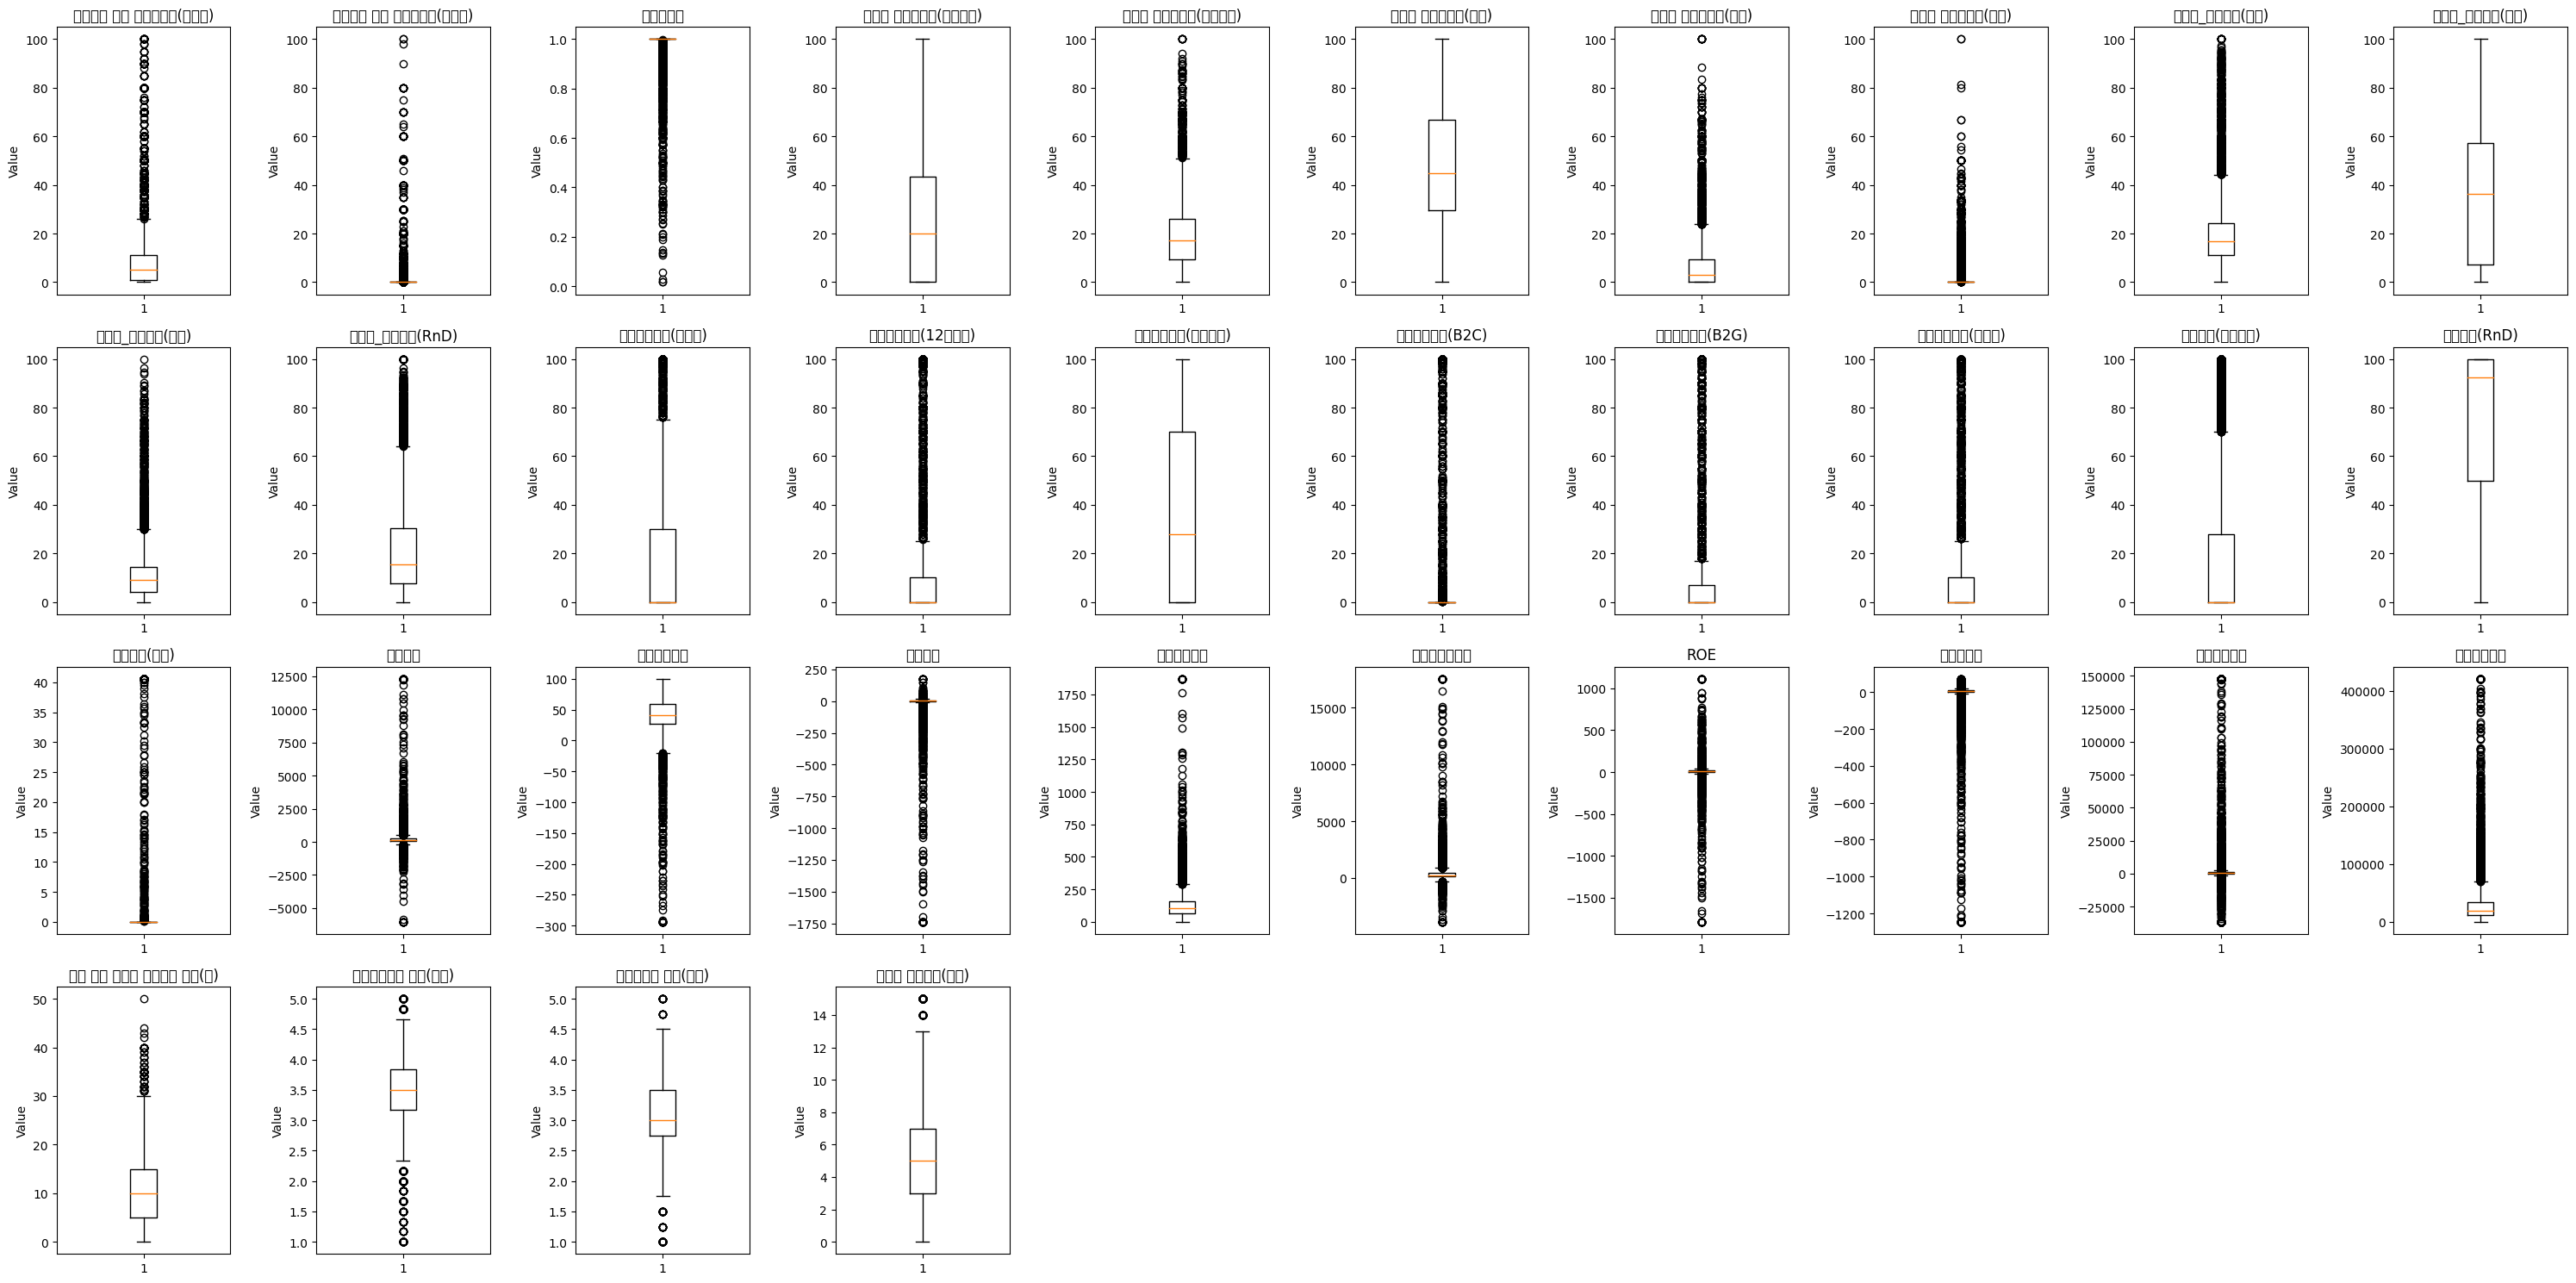

In [17]:
columns = ['주력제품 국내 시장점유율(퍼센트)', '주력제품 해외 시장점유율(퍼센트)', '정규직비율',
           '학력별 인력구성비(고졸이하)', '학력별 인력구성비(전문대졸)', '학력별 인력구성비(대졸)', '학력별 인력구성비(석사)',
           '학력별 인력구성비(박사)', '부서별_인력구성(관리)', '부서별_인력구성(생산)', '부서별_인력구성(영업)',
           '부서별_인력구성(RnD)', '매출구조비율(대기업)', '매출구조비율(12차벤더)',
           '매출구조비율(중소기업)', '매출구조비율(B2C)', '매출구조비율(B2G)', '매출구조비율(글로벌)',
           '투자액비(국내설비)', '투자액비(RnD)', '투자액비(해외)', '부채비율', '자기자본비율',
           '순이익률', '총자산회전율', '자기자본회전율', 'ROE', '영업이익률', '이자보상배율', '종사자생산성',
           '창업 당시 창업자 실무경험 년수(년)', '벤처확인제도 혜택(평균)', '벤처인프라 수준(평균)',
           '경영상 애로사항(개수)']

# subplots로 boxplot 출력
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(30, 15))

for i, col in enumerate(columns):
    ax = axes[i // 10, i % 10]
    ax.boxplot(re_df[col].dropna())
    ax.set_title(col)
    ax.set_ylabel('Value')

# 남은 서브플롯 삭제
for j in range(len(columns), 4 * 10):
    fig.delaxes(axes[j // 10, j % 10])

plt.tight_layout()
plt.show()

In [21]:
# re_df.to_csv('new_df.csv', index=False)

In [22]:
df = pd.read_csv('../../data/완성data/new_df.csv')
df

,회사주소_시(도),한국표준산업분류(KSIC)코드_10차,상장여부,인수합병(MnA) 경험여부,가중치,벤처확인 유형,기업성장단계,제조 및 비제조,대표이사_창업자여부,창업 당시 창업자 연령,...,영업이익률,이자보상배율,종사자생산성,창업 당시 창업자 실무경험 년수(년),벤처확인제도 혜택(평균),벤처인프라 수준(평균),등록보유(특허권),출원중(특허권),경영상 애로사항(개수),벤처캐피털(투자조합포함) 투자 경험여부
0,경기,A01110,0,2.0,10.420,3,2,4,1.0,2,...,-1245.946,-255.331,27.778,4.0,2.667,2.75,2,0,0,1
1,광주,A01110,0,2.0,3.484,1,4,4,1.0,3,...,4.289,417.742,120780.000,10.0,3.833,3.25,5,1,7,0
2,경남,A01122,0,2.0,13.645,2,4,4,1.0,3,...,9.194,276.033,24220.000,7.0,4.167,3.25,15,0,9,0
3,서울,A01123,1,2.0,2.061,2,3,4,1.0,4,...,0.790,14.706,11613.609,25.0,4.833,4.00,0,0,2,0
4,서울,A01123,1,2.0,2.294,2,3,4,1.0,3,...,-5.424,-102.653,12230.857,25.0,4.667,3.75,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,서울,R91136,0,2.0,30.356,1,2,4,1.0,4,...,-19.562,-1784.615,10781.818,12.0,4.167,3.25,7,2,12,0
12380,경기,S95110,0,2.0,0.323,2,3,1,1.0,2,...,2.927,1323.077,68563.333,0.0,3.333,3.00,1,1,1,0
12381,서울,S95120,1,2.0,0.323,2,2,4,1.0,4,...,-0.446,-101.471,29778.205,20.0,3.000,3.00,0,0,2,0
12382,서울,S95120,1,3.0,1.831,2,3,4,1.0,3,...,2.844,1009.924,22918.719,15.0,3.333,3.50,0,0,4,0
